In [1]:
from DistributedTraining.utils.data import *
from PIL import Image

import matplotlib.pyplot as plt

2025-09-09 11:37:57,794	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-09-09 11:37:58,435	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-09-09 11:37:58,487	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
path = "/Users/elliotweiner/software/datasets/human_seg/data/images"


dirs = os.listdir(path)[10:30]

image_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])

# Create an empty list to hold the loaded image objects
images = []

for filename in dirs:
    # Open the image using Pillow
    img = Image.open(path + '/' + filename)
    
    # Apply the transform
    tensor_img = image_transform(img)
    
    # Add the transformed tensor to your list
    images.append(tensor_img)
    print(f"Successfully processed {filename}")

    

print(images[0].shape)

Successfully processed ds12_couple-youth-in-love-paris.png
Successfully processed ds8_pexels-photo-531162.png
Successfully processed ds13_pexels-photo-883362.png
Successfully processed ds6_pexels-photo-247203.png
Successfully processed ds6_pexels-photo-747786.png
Successfully processed ds6_attractive-beautiful-body-smiling-41248.png
Successfully processed ds6_ache-adult-depression-expression-41253.png
Successfully processed ds2_pexels-photo-573271.png
Successfully processed ds8_pexels-photo-630005.png
Successfully processed ds6_pexels-photo-776942.png
Successfully processed ds8_pexels-photo-746839.png
Successfully processed ds6_girl-black-and-white-light-ptofile-611233.png
Successfully processed ds6_girl-car-pin-up-village-47322.png
Successfully processed ds8_pexels-photo-663449.png
Successfully processed ds6_pexels-photo-730056.png
Successfully processed ds2_pexels-photo-185937.png
Successfully processed ds7_pexels-photo-840663.png
Successfully processed ds1_person-couple-love-romanti

In [3]:
from DistributedTraining.models import *

In [4]:
model_config = {
        'input_shape':(3, 256, 256),
        'patch_size':4,
        'num_classes':2,
        'num_dims':256, 
        'num_heads':8, 
        'num_layers':4
    }
model = ClassSegmentationModel(model_config)

checkpoint_dir = "/Users/elliotweiner/software/ModelsDistributedTraining/model_weights"

state_dict = torch.load(os.path.join(checkpoint_dir, "patch_4.pt"), map_location=torch.device('cpu'))
model.load_state_dict(state_dict)


<All keys matched successfully>

In [13]:
idx = 5

In [14]:
seg_im = model(images[idx].unsqueeze(0)).squeeze(0)
mask = (torch.sigmoid(seg_im) > 0.5).long()

In [15]:
print(seg_im.shape)
print(images[idx].shape)

torch.Size([1, 256, 256])
torch.Size([3, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7380952..2.64].


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

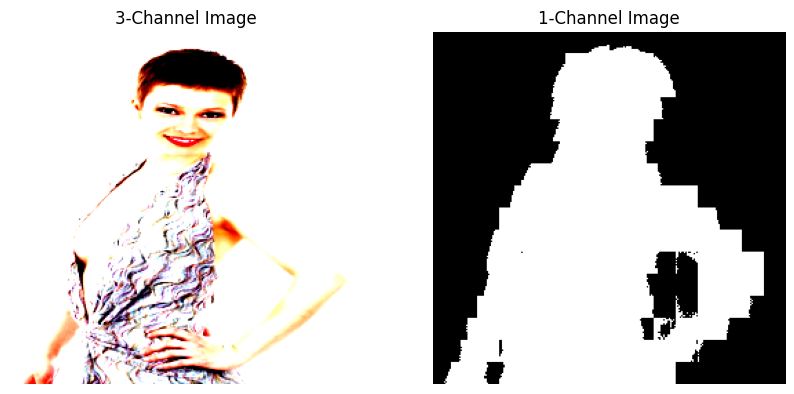

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the 3-channel image on the left subplot
# We use .permute(1, 2, 0) to change the tensor shape from (C, H, W) to (H, W, C)
# which is the format matplotlib expects for color images.
axes[0].imshow(images[idx].permute(1, 2, 0))
axes[0].set_title('3-Channel Image')
axes[0].axis('off')

# Plot the 1-channel image on the right subplot
# We use .squeeze(0) to remove the channel dimension, converting it to (H, W)
axes[1].imshow(mask.squeeze(0), cmap='gray')
axes[1].set_title('1-Channel Image')
axes[1].axis('off')